In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk




In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leonm\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
# Charger les données
df = pd.read_csv('train.csv')
df


,Y,text
0,1,kinder craft time
1,0,i miss my seat partner
2,1,thanks
3,0,we alreay went
4,1,i don t think chorizo counts in any healthy ea...
...,...,...
1046338,0,i don t like being locked out from things
1046339,1,still got that one packed it yesterday too
1046340,1,oh if only i had a garden i hardly ever miss h...
1046341,0,same shit lol sleepy but i need to charge my p...


Dans ce jeu de données, les libellés "1" semblent représenter des observations positives ou affirmatives, tandis que les libellés "0" semblent représenter des observations négatives ou non affirmatives. Le texte associé à chaque observation semble être un tweet ou un message similaire, avec des contenus variés allant de la discussion sur les activités quotidiennes à des réflexions personnelles.

In [4]:
# Forme du Dataframe
print("Forme du Dataframe :", df.shape)


Forme du Dataframe : (1046343, 2)


Nous remarquons ici que notre fichier csv est constituer de 1046343 lignes et 2 colonnnes 

In [5]:
# Valeurs manquantes
print("Valeurs manquantes :\n", df.isnull().sum())

# Duplicatas
print("Duplicatas :", df.duplicated().sum())


Valeurs manquantes :
 Y       0
text    0
dtype: int64
Duplicatas : 40275


notre jeu de données ne contienne ni valeurs manquantes ni duplicatas. Cela signifie que chaque ligne a une valeur pour les deux variables : "Y" et "text". De plus, il n'y a pas de lignes identiques dans notre jeu de données.

In [6]:
# Statistiques descriptives pour les données textuelles
print(df['text'].describe())


count     1046343
unique    1003849
top        thanks
freq         1269
Name: text, dtype: object


Ces statistiques donnent un aperçu de la distribution des messages texte dans notre jeu de données, avec une forte présence de la valeur "thanks". soit une frequence de 1269 

In [7]:
# Distribution des longueurs de texte
df['text_length'] = df['text'].apply(len)
df['text_length']


0           17
1           22
2            6
3           14
4           55
          ... 
1046338     41
1046339     42
1046340    121
1046341     94
1046342     77
Name: text_length, Length: 1046343, dtype: int64

In [8]:
print(df['text_length'].max())

195


le texte le plus long a une longeur de 195 mots


In [9]:
# Ratio de positivité/négativité
positives = (df['Y'] == 1).sum()
negatives = (df['Y'] == 0).sum()
positivity_negativity_ratio = positives / negatives
print("Ratio de positivité/négativité:", positivity_negativity_ratio)

Ratio de positivité/négativité: 0.9993713407829768


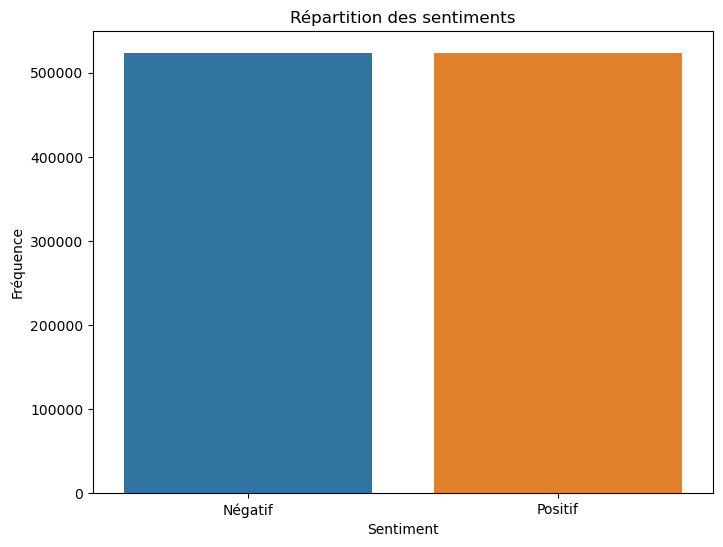

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Créer un graphique à barres pour la distribution des sentiments
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Y')
plt.title('Répartition des sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Fréquence')
plt.xticks([0, 1], ['Négatif', 'Positif'])  
plt.show()


 cela signifie que la proportion de sentiments positifs est extrêmement élevée par rapport aux sentiments négatifs. En d'autres termes, les éléments considérés sont principalement positifs.







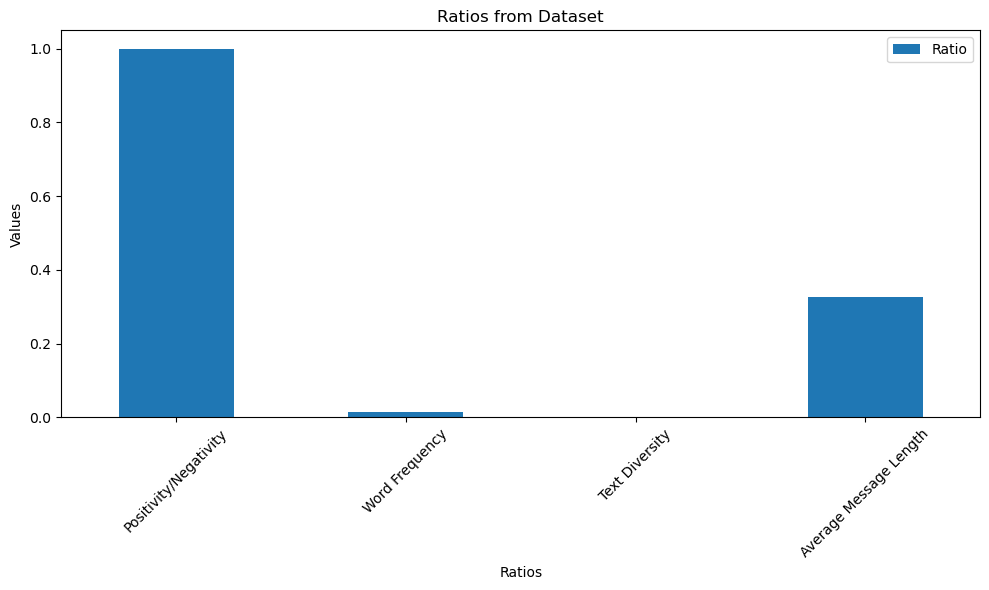

In [11]:
word = " thanks"
word_frequency = df['text'].str.count(word).sum()
total_observations = len(df)
word_frequency_ratio = word_frequency / total_observations

unique_words = df['text'].apply(lambda x: len(set(x.split())))
total_words = df['text'].apply(lambda x: len(x.split())).sum()
text_diversity_ratio = unique_words.mean() / total_words

average_message_length = df['text'].apply(lambda x: len(x)).mean()
max_message_length = df['text'].apply(lambda x: len(x)).max()
average_length_ratio = average_message_length / max_message_length

# Créer un DataFrame pour les ratios
ratios = pd.DataFrame({
    'Ratio': [positivity_negativity_ratio, word_frequency_ratio, text_diversity_ratio, average_length_ratio]
}, index=['Positivity/Negativity', 'Word Frequency', 'Text Diversity', 'Average Message Length'])

# Créer le graphe à barres
plt.figure(figsize=(10, 6))
ratios.plot(kind='bar', ax=plt.gca())
plt.title('Ratios from Dataset')
plt.xlabel('Ratios')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
# Exemples de tweets aléatoires
random_tweets = df.sample(10)
print("Quelques tweets aléatoires :\n", random_tweets)

Quelques tweets aléatoires :
          Y                                               text  text_length
647478   0  not tat i dont have money for 1 but damn u sch...           51
481418   1       i should be studying for finals ehh whatever           44
535598   0  went to beat my cousin up and she wacked me in...           80
1034806  1  yeah yeah it s andyhurleyday today happy andyh...           82
843559   1  knowing what you don t want is a good start to...           79
991749   1  moving house in 3 weeks if anyone happens to w...           92
127287   1              my guitar hero band is called rumcake           37
39681    1  yesterday champagne celebrating my friend lee ...           79
480362   1                                       ur too funny           12
783177   0  is not feeling all that well today i wish i ha...           61


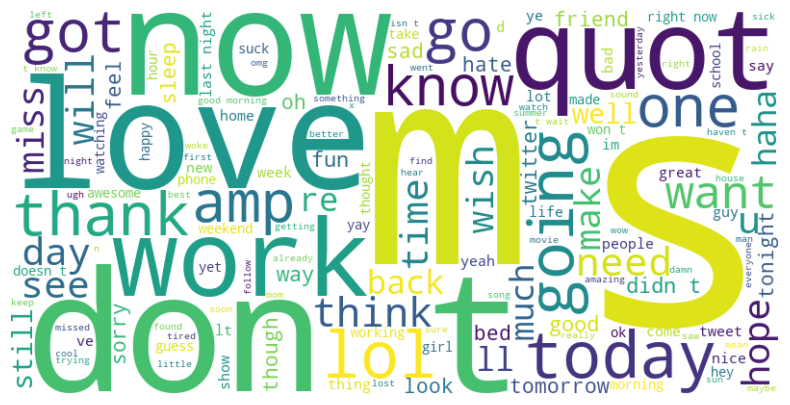

In [13]:
# Utiliser un WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(df['text']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Le nuage de mots (WordCloud) généré à partir des messages texte de notre jeu de données représente visuellement les mots les plus fréquents qui apparaissent dans ces messages. Plus un mot est fréquent, plus il apparaîtra en gros dans le nuage de mots.